In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cat_train_img = '/content/drive/MyDrive/train'
cat_train_csv  = '/content/_classes.csv'

animal_train_img = '/content/drive/MyDrive/train_image'
animal_train_csv = '/content/_classes_ANIMAL.csv'


** Load and Merge CSVs**

In [3]:
import pandas as pd

df_cat = pd.read_csv(cat_train_csv)
df_cat['source'] = 'cat'
df_animal = pd.read_csv(animal_train_csv)
df_animal['source'] = 'animal'

merged_df = pd.concat([df_cat, df_animal], ignore_index=True)

In [4]:
merged_df.to_csv('merged_dataset.csv', index=False)
from google.colab import files
files.download('merged_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Add Full Image Paths**

In [5]:
import os

def add_path(row):
    if row['source'] == 'cat':
        return os.path.join(cat_train_img, row['filename'])
    else:
        return os.path.join(animal_train_img, row['filename'])

merged_df['filepath'] = merged_df.apply(add_path, axis=1)

**Preprocess Images**

In [6]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
import os

IMG_SIZE = (224, 224)

def load_images(df):
    images = []
    labels = []
    for i, row in df.iterrows():
        try:
            img = image.load_img(row['filepath'], target_size=IMG_SIZE)
            img_array = image.img_to_array(img)
            img_array = preprocess_input(img_array)
            images.append(img_array)
            labels.append(row[['Jamur', 'Scabies']].values)  # adjust if more classes
        except:
            print("Missing:", row['filepath'])
    return np.array(images), np.array(labels)

X, y = load_images(merged_df)

Missing: /content/drive/MyDrive/train/j35_jpeg.rf.03b7262619027270e9834a110ce0c639.jpg
Missing: /content/drive/MyDrive/train/jamur20_jpeg.rf.033ccfcf690146f7a3dbd2df654c370c.jpg
Missing: /content/drive/MyDrive/train/jamur46_jpeg.rf.09aff5f49682fd4118260878f25926d9.jpg
Missing: /content/drive/MyDrive/train/jamur85_jpeg.rf.06aae1a46873f6bbb568e948f88b8e71.jpg
Missing: /content/drive/MyDrive/train/jamur27_jpeg.rf.05eda0c2399395b243b4f2eb250f42cf.jpg
Missing: /content/drive/MyDrive/train/was9_jpeg.rf.0aa7adc99d507779e3e2dcf7590daaf3.jpg
Missing: /content/drive/MyDrive/train/jamur9_jpeg.rf.0da4d60d8c6a26cc342d0f3946ee3b50.jpg
Missing: /content/drive/MyDrive/train/waj1_jpeg.rf.13c84355010a11cb17453ce3199e098c.jpg
Missing: /content/drive/MyDrive/train/j41_jpeg.rf.1b176e0e2575f4d8a1620915c15f7497.jpg
Missing: /content/drive/MyDrive/train/jamur12_jpeg.rf.15b5cebd0d9afedda3b925520903dc2e.jpg
Missing: /content/drive/MyDrive/train/jamur87_jpeg.rf.1bf2f895acaa78f603ea7346b1df15ba.jpg
Missing: /cont

In [7]:
print(type(X))
print(len(X))


<class 'numpy.ndarray'>
774


In [8]:
print(X.shape)


(774, 224, 224, 3)


In [9]:
print(merged_df.head())
print(merged_df['filepath'].isnull().sum())
print(merged_df['filepath'].iloc[0])

                                            filename   Jamur   Scabies source  \
0   j35_jpeg.rf.03b7262619027270e9834a110ce0c639.jpg     1.0       0.0    cat   
1  jamur20_jpeg.rf.033ccfcf690146f7a3dbd2df654c37...     1.0       0.0    cat   
2  jamur46_jpeg.rf.09aff5f49682fd4118260878f25926...     1.0       0.0    cat   
3  jamur85_jpeg.rf.06aae1a46873f6bbb568e948f88b8e...     1.0       0.0    cat   
4  jamur27_jpeg.rf.05eda0c2399395b243b4f2eb250f42...     1.0       0.0    cat   

    bacteriadermatosis_dog   flea_allergy   fungalinfection_dog   healthy  \
0                      NaN            NaN                   NaN       NaN   
1                      NaN            NaN                   NaN       NaN   
2                      NaN            NaN                   NaN       NaN   
3                      NaN            NaN                   NaN       NaN   
4                      NaN            NaN                   NaN       NaN   

    healthy_dog   hypersensitive_dog   ringworm   

**Load images into X using this:**

In [10]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

IMG_SIZE = (224, 224)
X = []

for path in merged_df['filepath']:
    try:
        img = image.load_img(path, target_size=IMG_SIZE)
        img_array = image.img_to_array(img)
        img_array = preprocess_input(img_array)
        X.append(img_array)
    except Exception as e:
        print(f"Failed to load {path}: {e}")

X = np.array(X)
print("Loaded image shape:", X.shape)


Loaded image shape: (774, 224, 224, 3)


**Then run feature extraction:**

In [11]:
print("Type:", type(X))
print("Length:", len(X))

# If it's a NumPy array
try:
    print("Shape:", X.shape)
except:
    pass


Type: <class 'numpy.ndarray'>
Length: 774
Shape: (774, 224, 224, 3)


In [12]:
print(merged_df['filepath'].head())
print(merged_df['filepath'].apply(lambda x: os.path.exists(x)).value_counts())


0    /content/drive/MyDrive/train/j35_jpeg.rf.03b72...
1    /content/drive/MyDrive/train/jamur20_jpeg.rf.0...
2    /content/drive/MyDrive/train/jamur46_jpeg.rf.0...
3    /content/drive/MyDrive/train/jamur85_jpeg.rf.0...
4    /content/drive/MyDrive/train/jamur27_jpeg.rf.0...
Name: filepath, dtype: object
filepath
True    774
Name: count, dtype: int64


Feature **Extraction** **bold text**

In [13]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model

base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

features = feature_extractor.predict(X, batch_size=32, verbose=1)


25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step


**. Ensure Features are Extracted:**

In [14]:

from tensorflow.keras.preprocessing import image
import numpy as np


# Check the shape of the extracted features
print("Shape of extracted features:", features.shape)


Shape of extracted features: (774, 7, 7, 1280)


** Flatten the Extracted Features (if needed):**

In [15]:
# Flatten the extracted features
flattened_features = features.reshape(features.shape[0], -1)

# Print the shape of flattened features
print("Shape of flattened features:", flattened_features.shape)


Shape of flattened features: (774, 62720)


** Check the Features:**

In [16]:
# View the first few extracted features
print(flattened_features[:5])  # Prints the flattened features of the first 5 images


[[0.         0.         0.         ... 0.         0.         1.4247894 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.49779558 0.         ... 0.         0.         0.        ]]


**Save Features for Later Use**

In [17]:
import pandas as pd

# Convert the flattened features into a DataFrame
feature_df = pd.DataFrame(flattened_features)

# Save the DataFrame to a CSV file
feature_df.to_csv('extracted_features.csv', index=False)


In [18]:
feature_df.head()

,0,1,2,3,4,5,6,7,8,9,...,62710,62711,62712,62713,62714,62715,62716,62717,62718,62719
0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,2.620445,...,0.0,0.0,0.0,0.0,1.311258,0.0,0.0,0.0,0.0,1.424789
1,0.0,0.000000,0.0,1.119647,0.957101,0.00000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,1.781242,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.000000,0.0,0.000000,0.000000,0.38252,0.0,1.545795,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.497796,0.0,0.439369,0.000000,0.00000,0.0,0.000000,0.521209,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


**Make Sure Labels and Features Are Aligned==**

In [19]:
# Confirm the number of labels matches the number of extracted features
print(flattened_features.shape[0], len(merged_df))
print(merged_df.columns)


774 774
Index(['filename', ' Jamur', ' Scabies', 'source', ' bacteriadermatosis_dog',
       ' flea_allergy', ' fungalinfection_dog', ' healthy', ' healthy_dog',
       ' hypersensitive_dog', ' ringworm', ' scabies', 'filepath'],
      dtype='object')


If you want to create a single label (multi-class classification):

In [20]:
# First, clean column names
merged_df.columns = merged_df.columns.str.strip()

# Now create a single label column
label_columns = ['Jamur', 'Scabies', 'bacteriadermatosis_dog', 'flea_allergy',
                 'fungalinfection_dog', 'healthy', 'healthy_dog', 'hypersensitive_dog',
                 'ringworm', 'scabies']

merged_df['label'] = merged_df[label_columns].idxmax(axis=1)  # Finds the first label with value 1
feature_df['label'] = merged_df['label'].values



Clean Column Names (if not already)

In [21]:
merged_df.columns = merged_df.columns.str.strip()


Create Single Label Column from One-Hot Columns

In [22]:
label_columns = ['Jamur', 'Scabies', 'bacteriadermatosis_dog', 'flea_allergy',
                 'fungalinfection_dog', 'healthy', 'healthy_dog', 'hypersensitive_dog',
                 'ringworm', 'scabies']

merged_df['label'] = merged_df[label_columns].idxmax(axis=1)


Add This Label to Your Extracted Features

In [23]:
feature_df['label'] = merged_df['label'].values


Save the Final Features with Labels

In [24]:
feature_df.to_csv('extracted_features_with_labels.csv', index=False)


In [25]:
np.save('//content/drive/MyDrive/Animal Skin Disease.v3i.multiclass/features.npy', features)
np.save('/content/drive/MyDrive/labels.npy', y)

Mrging 3rd dataset

In [26]:
import os
import pandas as pd

lumpy_skin_path = '/content/drive/MyDrive/train_lumpy/'

lumpy_data = []
for img_file in os.listdir(lumpy_skin_path):
    if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
        lumpy_data.append({
            'filename': img_file,
            'label': 'lumpy_skin',
            'filepath': os.path.join(lumpy_skin_path, img_file),
            'source': 'lumpy'
        })

df_lumpy = pd.DataFrame(lumpy_data)


**Merge With Existing merged_df**

In [27]:
merged_df = pd.concat([merged_df, df_lumpy], ignore_index=True)


 Reset & Sanitize Labels (if needed)

In [28]:
print(merged_df['label'].value_counts())


label
lumpy_skin                450
Jamur                     111
fungalinfection_dog       104
flea_allergy               91
healthy                    84
scabies                    83
ringworm                   82
bacteriadermatosis_dog     76
healthy_dog                62
hypersensitive_dog         60
Scabies                    21
Name: count, dtype: int64


In [29]:
merged_df.shape

(1224, 14)

In [30]:
from google.colab import files
files.download('extracted_features_with_labels.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Preprocess All Merged Images**

In [31]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

IMG_SIZE = (224, 224)

X = []  # Preprocessed images
valid_indices = []  # Track indices with successfully loaded images

for idx, row in merged_df.iterrows():
    try:
        img_path = row['filepath']
        img = image.load_img(img_path, target_size=IMG_SIZE)
        img_array = image.img_to_array(img)
        img_array = preprocess_input(img_array)
        X.append(img_array)
        valid_indices.append(idx)
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")

X = np.array(X)


Extract Features Using MobileNetV2

In [32]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model

base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

features = feature_extractor.predict(X, batch_size=32, verbose=1)
flattened_features = features.reshape(features.shape[0], -1)


39/39 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step


Create Final DataFrame with Labels

In [33]:
valid_labels = merged_df.iloc[valid_indices]['label' if 'label' in merged_df.columns else ' Jamur'].values
feature_df = pd.DataFrame(flattened_features)
feature_df['label'] = valid_labels


Save Features

In [34]:
feature_df.to_csv('extracted_features_with_ALL_DEASE_labels.csv', index=False)


In [35]:
##Inspect the Features Shape
print("Extracted features shape:", flattened_features.shape)


Extracted features shape: (1224, 62720)


In [36]:
##Display the Feature Columns
print("First 5 rows of features:")
print(feature_df.head())


First 5 rows of features:
     0         1    2         3         4        5    6         7         8  \
0  0.0  0.000000  0.0  0.000000  0.000000  0.00000  0.0  0.000000  0.000000   
1  0.0  0.000000  0.0  1.119647  0.957101  0.00000  0.0  0.000000  0.000000   
2  0.0  0.000000  0.0  0.000000  0.000000  0.00000  0.0  0.000000  1.781242   
3  0.0  0.000000  0.0  0.000000  0.000000  0.38252  0.0  1.545795  0.000000   
4  0.0  0.497796  0.0  0.439369  0.000000  0.00000  0.0  0.000000  0.521209   

          9  ...  62711  62712  62713     62714  62715  62716  62717  62718  \
0  2.620445  ...    0.0    0.0    0.0  1.311258    0.0    0.0    0.0    0.0   
1  0.000000  ...    0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0   
2  0.000000  ...    0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0   
3  0.000000  ...    0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0   
4  0.000000  ...    0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0   

      62719  label  
0  

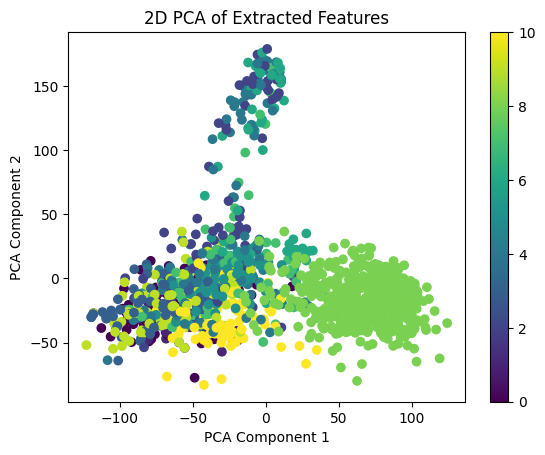

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'label' column contains the original class names
# Convert the categorical labels to numeric values using LabelEncoder
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(feature_df['label'])

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(flattened_features)

# Plot the reduced features using the numeric labels for color
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=numeric_labels, cmap='viridis')
plt.title("2D PCA of Extracted Features")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar()
plt.show()


In [38]:
##Inspect Layer Names and Outputs
# List all layers in the model to understand where features are extracted from
for layer in base_model.layers:
    print(layer.name)


input_layer_1
Conv1
bn_Conv1
Conv1_relu
expanded_conv_depthwise
expanded_conv_depthwise_BN
expanded_conv_depthwise_relu
expanded_conv_project
expanded_conv_project_BN
block_1_expand
block_1_expand_BN
block_1_expand_relu
block_1_pad
block_1_depthwise
block_1_depthwise_BN
block_1_depthwise_relu
block_1_project
block_1_project_BN
block_2_expand
block_2_expand_BN
block_2_expand_relu
block_2_depthwise
block_2_depthwise_BN
block_2_depthwise_relu
block_2_project
block_2_project_BN
block_2_add
block_3_expand
block_3_expand_BN
block_3_expand_relu
block_3_pad
block_3_depthwise
block_3_depthwise_BN
block_3_depthwise_relu
block_3_project
block_3_project_BN
block_4_expand
block_4_expand_BN
block_4_expand_relu
block_4_depthwise
block_4_depthwise_BN
block_4_depthwise_relu
block_4_project
block_4_project_BN
block_4_add
block_5_expand
block_5_expand_BN
block_5_expand_relu
block_5_depthwise
block_5_depthwise_BN
block_5_depthwise_relu
block_5_project
block_5_project_BN
block_5_add
block_6_expand
block_6_

In [39]:
# Choose a layer name from the list of layers in the model
specific_layer = base_model.get_layer('block_16_project')
specific_feature_extractor = Model(inputs=base_model.input, outputs=specific_layer.output)

# Now, extract the features for a specific image (X)
features_specific_layer = specific_feature_extractor.predict(X)
print("Features from specific layer shape:", features_specific_layer.shape)




39/39 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step
Features from specific layer shape: (1224, 7, 7, 320)


In [40]:
from google.colab import files
files.download('extracted_features_with_labels.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Split features and labels
X = feature_df.drop('label', axis=1).values
y = feature_df['label'].values

In [43]:

# Encode string labels to numeric
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Define models to test
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(kernel='linear', probability=True),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}



Model: Random Forest
Classification Report:
                        precision    recall  f1-score   support

                 Jamur       0.40      0.64      0.49        22
               Scabies       0.00      0.00      0.00         4
bacteriadermatosis_dog       1.00      0.27      0.42        15
          flea_allergy       0.74      0.78      0.76        18
   fungalinfection_dog       0.48      0.52      0.50        21
               healthy       0.71      0.71      0.71        17
           healthy_dog       0.89      0.67      0.76        12
    hypersensitive_dog       0.00      0.00      0.00        12
            lumpy_skin       0.77      1.00      0.87        90
              ringworm       0.25      0.12      0.16        17
               scabies       0.77      0.59      0.67        17

              accuracy                           0.67       245
             macro avg       0.55      0.48      0.48       245
          weighted avg       0.64      0.67      0.63    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


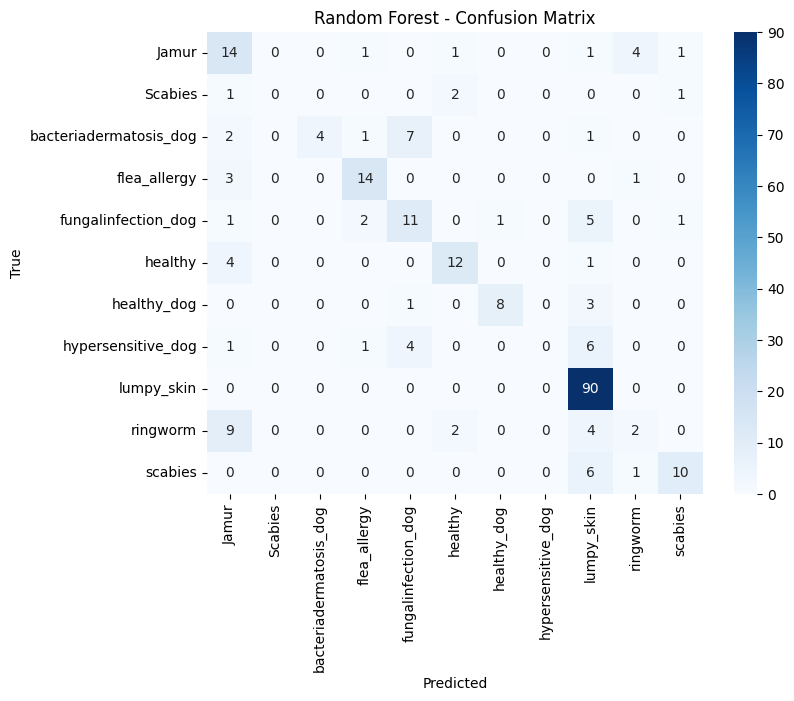


Model: Logistic Regression
Classification Report:
                        precision    recall  f1-score   support

                 Jamur       0.46      0.50      0.48        22
               Scabies       1.00      0.25      0.40         4
bacteriadermatosis_dog       0.59      0.67      0.62        15
          flea_allergy       0.88      0.78      0.82        18
   fungalinfection_dog       0.75      0.71      0.73        21
               healthy       0.78      0.82      0.80        17
           healthy_dog       0.82      0.75      0.78        12
    hypersensitive_dog       0.86      0.50      0.63        12
            lumpy_skin       0.95      1.00      0.97        90
              ringworm       0.17      0.18      0.17        17
               scabies       0.89      0.94      0.91        17

              accuracy                           0.77       245
             macro avg       0.74      0.65      0.67       245
          weighted avg       0.78      0.77      0.

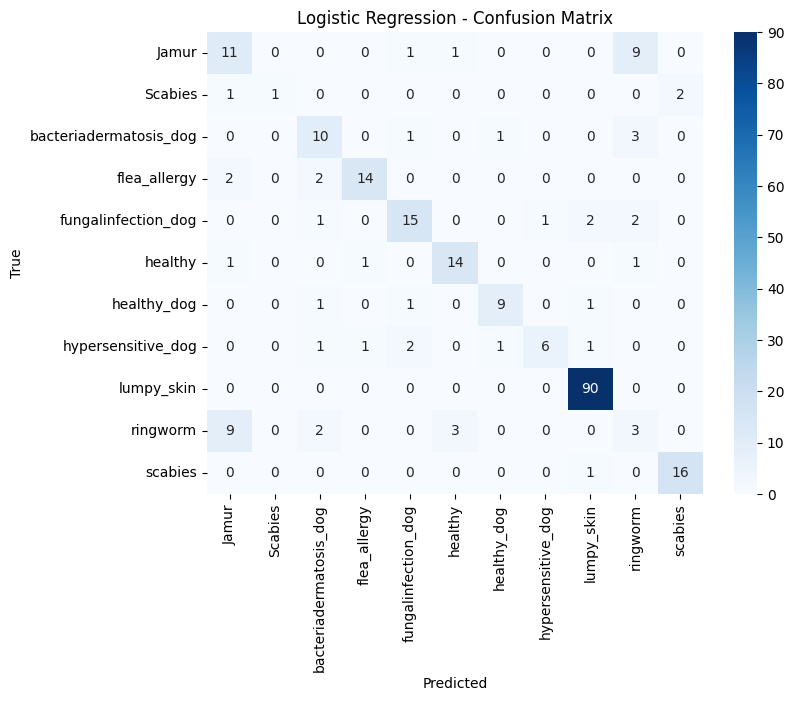


Model: Support Vector Machine
Classification Report:
                        precision    recall  f1-score   support

                 Jamur       0.44      0.50      0.47        22
               Scabies       1.00      0.50      0.67         4
bacteriadermatosis_dog       0.62      0.53      0.57        15
          flea_allergy       0.93      0.78      0.85        18
   fungalinfection_dog       0.58      0.71      0.64        21
               healthy       0.88      0.82      0.85        17
           healthy_dog       0.91      0.83      0.87        12
    hypersensitive_dog       0.67      0.50      0.57        12
            lumpy_skin       0.95      1.00      0.97        90
              ringworm       0.07      0.06      0.06        17
               scabies       0.84      0.94      0.89        17

              accuracy                           0.76       245
             macro avg       0.72      0.65      0.67       245
          weighted avg       0.76      0.76     

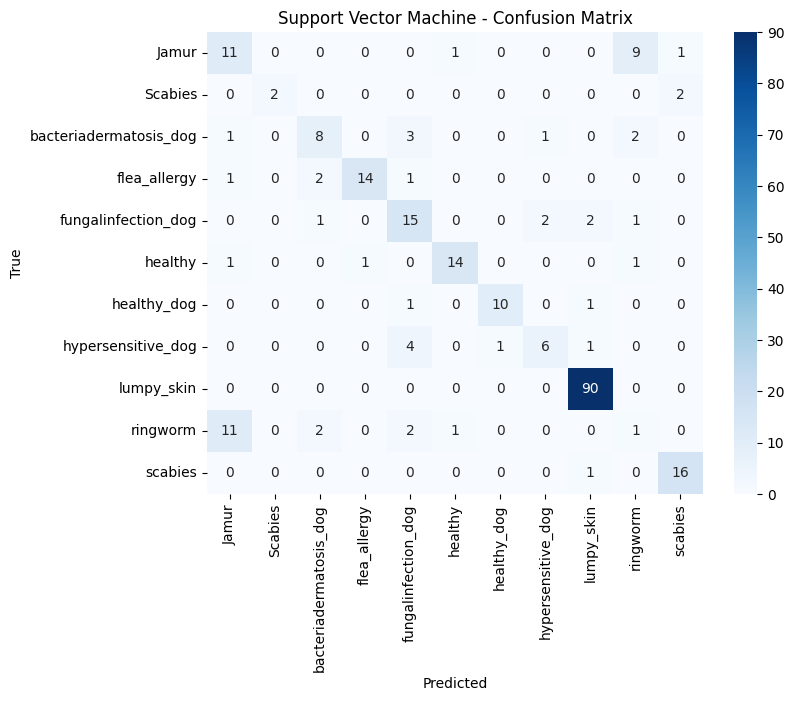


Model: Naive Bayes
Classification Report:
                        precision    recall  f1-score   support

                 Jamur       0.14      0.05      0.07        22
               Scabies       0.00      0.00      0.00         4
bacteriadermatosis_dog       0.67      0.13      0.22        15
          flea_allergy       0.80      0.22      0.35        18
   fungalinfection_dog       0.09      0.05      0.06        21
               healthy       1.00      0.06      0.11        17
           healthy_dog       0.67      0.17      0.27        12
    hypersensitive_dog       0.00      0.00      0.00        12
            lumpy_skin       0.42      1.00      0.60        90
              ringworm       0.00      0.00      0.00        17
               scabies       0.00      0.00      0.00        17

              accuracy                           0.41       245
             macro avg       0.34      0.15      0.15       245
          weighted avg       0.38      0.41      0.29      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


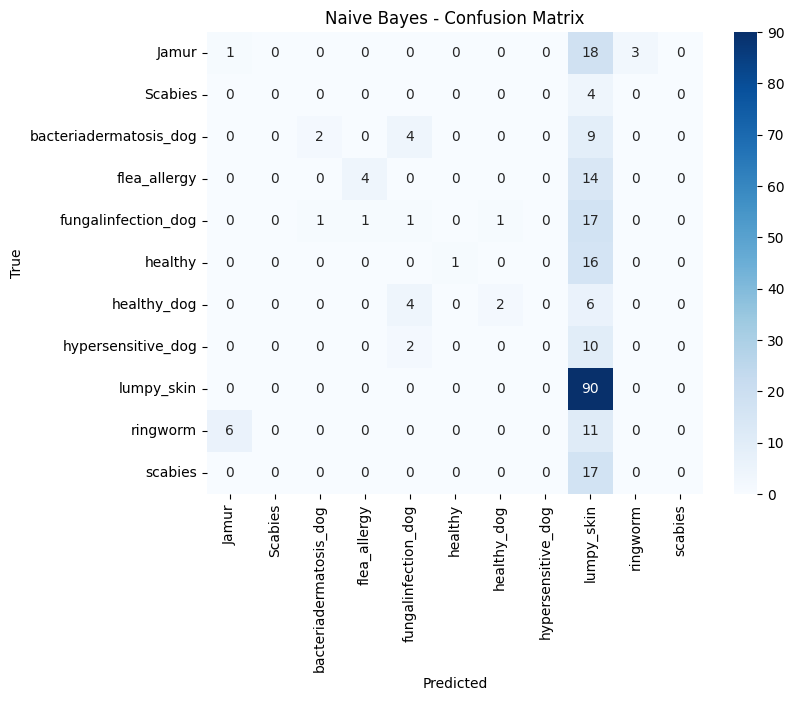


Model: K-Nearest Neighbors
Classification Report:
                        precision    recall  f1-score   support

                 Jamur       0.56      0.45      0.50        22
               Scabies       1.00      0.25      0.40         4
bacteriadermatosis_dog       0.38      0.33      0.36        15
          flea_allergy       1.00      0.61      0.76        18
   fungalinfection_dog       0.31      0.43      0.36        21
               healthy       0.40      1.00      0.58        17
           healthy_dog       0.39      0.75      0.51        12
    hypersensitive_dog       1.00      0.08      0.15        12
            lumpy_skin       0.90      0.98      0.94        90
              ringworm       0.33      0.12      0.17        17
               scabies       1.00      0.18      0.30        17

              accuracy                           0.64       245
             macro avg       0.66      0.47      0.46       245
          weighted avg       0.71      0.64      0.

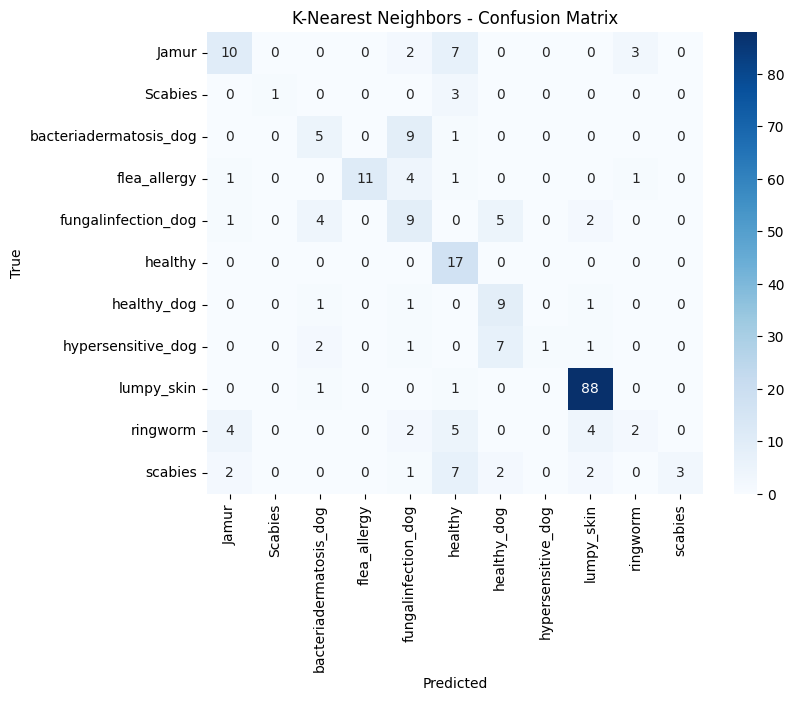

In [44]:

# Fit and evaluate each model
for name, model in models.items():
    print(f"\nModel: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


In [45]:
import matplotlib.pyplot as plt

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    results[name] = acc




In [52]:
# Find best model by accuracy
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

In [53]:
best_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

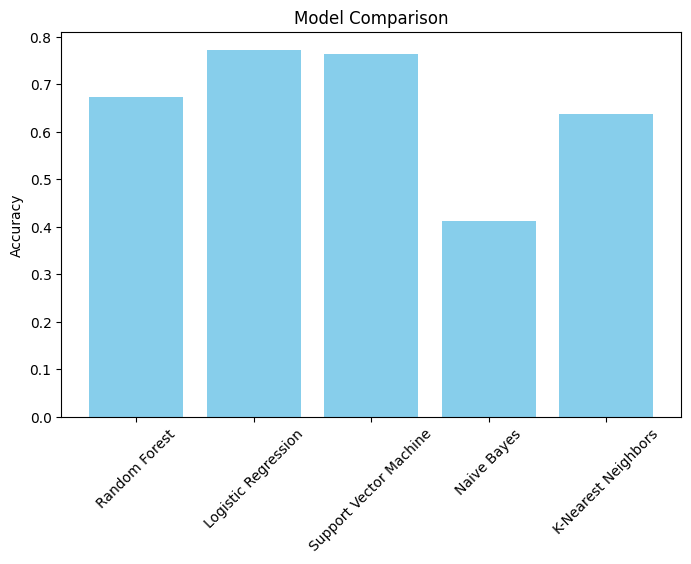

In [46]:
# Plot
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.xticks(rotation=45)
plt.show()

In [54]:
import joblib
joblib.dump(best_model, 'best_animal_skin_model.pkl')
joblib.dump(le, 'label_encoder.pkl')
print(f"Saved model: {best_model_name}")

Saved model: Logistic Regression


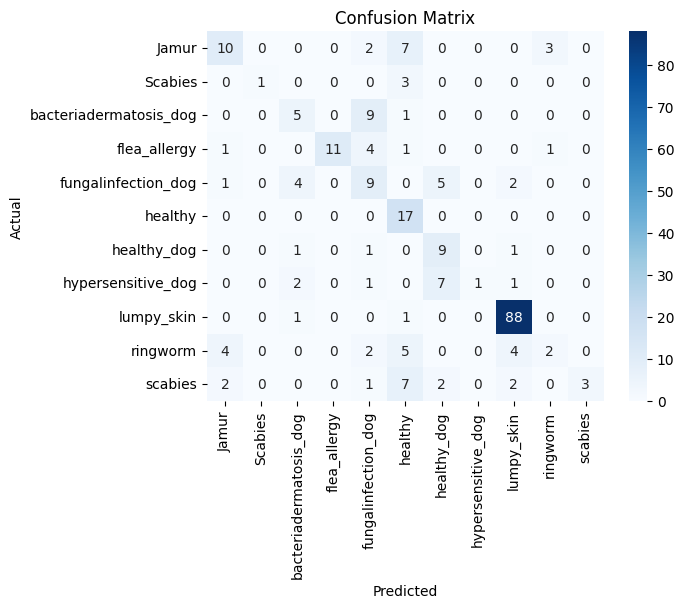

In [55]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [61]:
def predict_image(img_path, model, label_encoder):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)
    features = feature_extractor.predict(np.expand_dims(img_array, axis=0))
    features = features.reshape(1, -1)
    pred = model.predict(features)
    return label_encoder.inverse_transform(pred)[0]

print(predict_image('/content/143867586_10226592175940714_8038162198825059119_n_jpg.rf.027be6364dd098132ee15df3b0e9f910.jpg', best_model, le))

print(predict_image('/content/Lumpy_Skin_19.png', best_model, le))

print(predict_image('/content/waj13_jpeg.rf.5ea317232f264e3da3fec83f1204b7cc.jpg', best_model, le))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
ringworm
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
lumpy_skin
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
Jamur


In [62]:
rf_model = joblib.load('best_animal_skin_model.pkl')
le = joblib.load('label_encoder.pkl')


In [63]:
!pip install gradio --quiet

In [64]:
import gradio as gr
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
import joblib

In [65]:
# Load model and label encoder
model = joblib.load('best_animal_skin_model.pkl')
le = joblib.load('label_encoder.pkl')

In [67]:
# Load feature extractor
feature_extractor = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224,224,3), pooling='avg')

def predict_image(img):
    try:
        img = img.resize((224, 224))
        img_array = image.img_to_array(img)
        img_array = preprocess_input(img_array)
        img_array = np.expand_dims(img_array, axis=0)

        features = feature_extractor.predict(img_array)
        pred = model.predict(features)

        if hasattr(pred, "argmax"):
            pred_class = np.argmax(pred, axis=1)
        else:
            pred_class = pred

        label = le.inverse_transform(pred_class)[0]
        return f"Prediction: {label}"

    except Exception as e:
        return f"⚠️ Error: {str(e)}"




interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Animal Skin Disease Detector",
    description="Upload an animal skin image to detect disease."
)



In [68]:
interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e3a010dc66ef42d756.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
